<h1 align="center">
<img src="https://drive.google.com/uc?export=view&id=1_ZkE3dnYg9KykzdZE6lIK2s_q_nbiKk_" width="160" height="160">
</h1>
<h1 align="center">Statistical Learning - 255381</h1>
<h3 align="center">Dr. Hoda Mohammadzade</h3>
<h5 align="center">Sharif University of Technology<br/>Electrical Engineering Department<br/>  Spring 2022</h5>

---

# Project - Phase_1
<h4 align="center">Vahid Pourakbar     400205511</h4>


---
---

In [2]:
%reset -f
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import noisereduce as nr
from IPython.display import Audio, display
import sys
sys.path.append(r'../')
from utils import dataset, max_length, pre_processing_dataset, zero_padding_data

## Part B

In [3]:
train_path = r'..\Dataset\train'
test_path = r'..\Dataset\test'
X_train, Y_train, I_train, sr = dataset(train_path)
X_test, Y_test, I_test, sr = dataset(test_path)

## Part C

In [4]:
sample = X_train[1873].copy()
display(Audio(sample, rate = sr,autoplay=True))

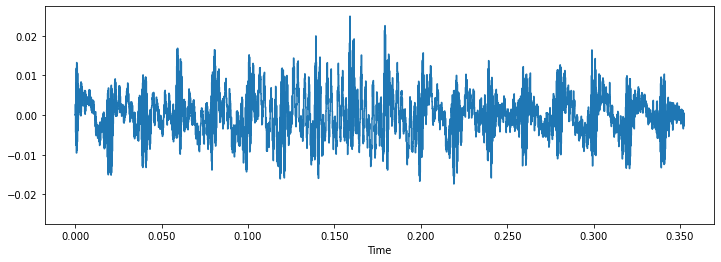

In [5]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(X_train[0], sr=sr, x_axis='time')

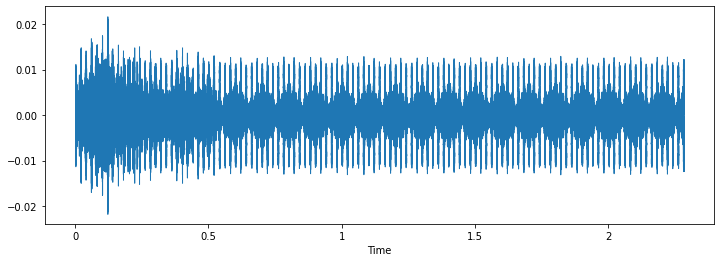

In [6]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(sample, sr=sr, x_axis='time')

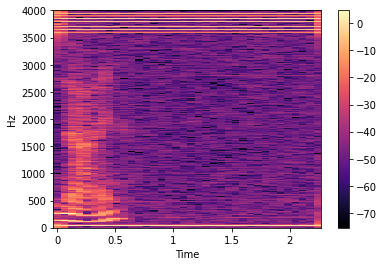

In [7]:
librosa.display.specshow(librosa.amplitude_to_db(abs(librosa.stft(sample))), sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

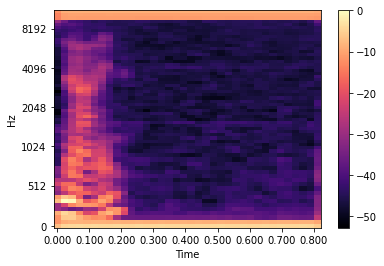

In [8]:
S1 = librosa.feature.melspectrogram(y=sample, sr=sr, n_mels=64)
D1 = librosa.power_to_db(S1, ref=np.max)
librosa.display.specshow(D1, x_axis='time', y_axis='mel')
plt.colorbar()

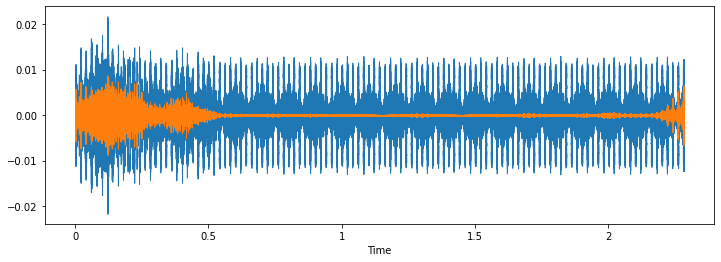

In [9]:
Xf1873 = nr.reduce_noise(y=sample, sr=sr)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(sample, sr=sr, x_axis='time')
librosa.display.waveshow(Xf1873, sr=sr, x_axis='time')

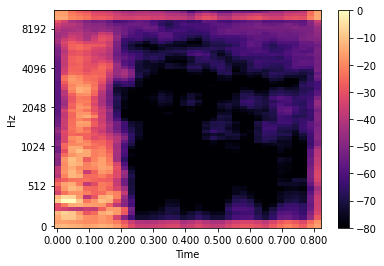

In [11]:
Sf1 = librosa.feature.melspectrogram(y=Xf1873, sr=sr, n_mels=64)
Df1 = librosa.power_to_db(Sf1, ref=np.max)
librosa.display.specshow(Df1, x_axis='time', y_axis='mel')
plt.colorbar()

In [12]:
# from scipy import signal
# import random

# def f_high(y,sr):
#     b,a = signal.butter(20, 2000/(sr/2), btype='highpass')
#     yf = signal.lfilter(b,a,y)
#     return yf

# Xf0 = f_high(X[0], sr)
# plt.figure(figsize=(12, 4))
# librosa.display.waveshow(X[0],sr=sr, x_axis='time')
# librosa.display.waveshow(Xf0,sr=sr, x_axis='time')

In [13]:
# import soundfile as sf
# # sf.write('X0.wav', X[0],rates[0])
# # sf.write('Xf1873_nr1.wav', Xf1873,sr)
display(Audio(Xf1873, rate = sr,autoplay=True))

## Part D

In [12]:
# short time fourier transform
# (n_fft and hop length determine frequency/time resolution)
n_fft = 2048
S = librosa.stft(sample, n_fft=n_fft, hop_length=n_fft//2)
# convert to db
D = librosa.amplitude_to_db(np.abs(S), ref=np.max)
np.max(abs(D))

80.0

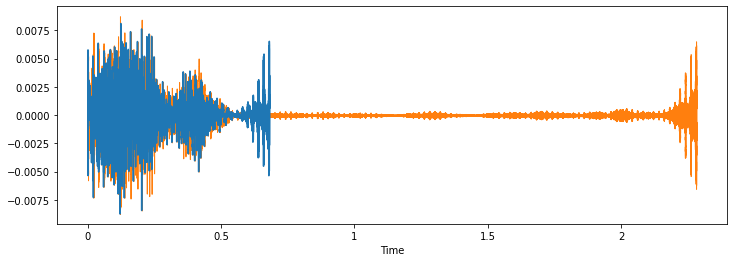

In [13]:
# clips = librosa.effects.trim(Xf1873, top_db= 10)
clips = librosa.effects.split(Xf1873, top_db=10)
wav_data = []
for c in clips:
    # print(c)
    data = Xf1873[c[0]: c[1]]
    wav_data.extend(data)

plt.figure(figsize=(12, 4))
librosa.display.waveshow(np.asarray(wav_data), sr=sr, x_axis='time')
librosa.display.waveshow(Xf1873, sr=sr, x_axis='time')

## Phase_1

In [14]:
audio_data_train = pre_processing_dataset(X_train)
audio_data_test = pre_processing_dataset(X_test)

max_len = max(max_length(audio_data_train), max_length(audio_data_test))

output_audio_train = zero_padding_data(audio_data_train, max_len)
output_audio_test = zero_padding_data(audio_data_test, max_len)

In [15]:
with open('Phase1_train.npy', 'wb') as f:
    np.save(f, np.asarray(output_audio_train))
    # np.save(f, X_train)
    np.save(f, Y_train)
    np.save(f, I_train)

with open('Phase1_test.npy', 'wb') as f:
    np.save(f, np.asarray(output_audio_test))
    np.save(f, Y_test)
    np.save(f, I_test)